In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, MinMaxScaler, \
PowerTransformer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from tpot import TPOTClassifier

In [2]:
df = pd.read_csv('QUB_Insurance_Data_Assignment_Training.csv')
df.head(10)

,CustomerID,Title,GivenName,MiddleInitial,Surname,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
0,1,Mrs.,Macy,A,Boyle,AMEX,Clinical laboratory technologist,female,23,Urban,No,NaN,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS
1,2,Ms.,Thea,L,McIntosh,AMEX,NaN,female,44,Urban,No,NaN,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone
2,4,Ms.,Murron,P,Miller,AMEX,Sheriff,female,19,Urban,Yes,4920.0,Bundle,No,NaN,NaN,NaN,No,NaN,SMS
3,5,Mr.,Kai,A,Henderson,Visa,Automotive painter,male,47,Rural,Yes,14994.0,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone
4,11,Mrs.,Kayla,A,Brown,Visa,Risk manager,female,54,Rural,Yes,14605.0,Single,Yes,Level2,2.0,3.0,No,NaN,Email
5,13,Mr.,Muhammed,L,King,AMEX,Building cleaning worker,male,49,Rural,Yes,32115.0,Single,Yes,Level1,1.0,2.0,Yes,Premium,E
6,14,Mr.,Lucas,C,Gilbert,Visa,Farm and home management advisor,male,19,Rural,Yes,29409.0,Bundle,No,NaN,NaN,NaN,Yes,Business,Email
7,16,Mr.,Shay,P,Sinclair,AMEX,Recreation supervisor,male,68,Rural,Yes,325940.0,Bundle,Yes,Level3,0.0,0.0,No,NaN,Phone
8,17,Ms.,Eve,C,Sutherland,Visa,Computer systems analyst,f,20,Urban,Yes,26503.0,Single,Yes,Level2,0.0,0.0,No,NaN,Email
9,18,Mr.,Muhammad,N,McGregor,AMEX,Fire inspector,male,49,Urban,Yes,23666.0,Single,Yes,Level2,2.0,2.0,No,NaN,Email


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4090.0,2604.479218,1498.310160,1.0,1295.25,2594.5,3908.75,5200.0
Age,4090.0,41.391443,15.985643,-44.0,22.00,46.0,50.00,210.0
MotorValue,3361.0,23450.911336,11985.631467,-25686.0,14837.00,25045.0,32289.00,325940.0
HealthDependentsAdults,2543.0,0.816359,0.645519,0.0,0.00,1.0,1.00,2.0
HealthDependentsKids,2543.0,1.748329,1.108392,0.0,0.00,2.0,3.00,3.0


In [4]:
df.describe(include=['object']).T

,count,unique,top,freq
Title,4090,4,Mr.,1950
GivenName,4090,897,Morgan,27
MiddleInitial,4090,25,A,459
Surname,4090,524,Henderson,38
CreditCardType,3368,2,AMEX,1728
Occupation,2534,1591,HIV/AIDS nurse,6
Gender,4090,4,female,2063
Location,4090,2,Urban,2323
MotorInsurance,4090,2,Yes,3361
MotorType,3361,2,Single,2287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4090 non-null   int64  
 1   Title                   4090 non-null   object 
 2   GivenName               4090 non-null   object 
 3   MiddleInitial           4090 non-null   object 
 4   Surname                 4090 non-null   object 
 5   CreditCardType          3368 non-null   object 
 6   Occupation              2534 non-null   object 
 7   Gender                  4090 non-null   object 
 8   Age                     4090 non-null   int64  
 9   Location                4090 non-null   object 
 10  MotorInsurance          4090 non-null   object 
 11  MotorValue              3361 non-null   float64
 12  MotorType               3361 non-null   object 
 13  HealthInsurance         4090 non-null   object 
 14  HealthType              2543 non-null   

In [6]:
df.nunique()

CustomerID                4090
Title                        4
GivenName                  897
MiddleInitial               25
Surname                    524
CreditCardType               2
Occupation                1591
Gender                       4
Age                         55
Location                     2
MotorInsurance               2
MotorValue                3113
MotorType                    2
HealthInsurance              2
HealthType                   3
HealthDependentsAdults       3
HealthDependentsKids         4
TravelInsurance              2
TravelType                   5
PrefChannel                  6
dtype: int64

In [7]:
df.isnull().sum()

CustomerID                   0
Title                        0
GivenName                    0
MiddleInitial                0
Surname                      0
CreditCardType             722
Occupation                1556
Gender                       0
Age                          0
Location                     0
MotorInsurance               0
MotorValue                 729
MotorType                  729
HealthInsurance              0
HealthType                1547
HealthDependentsAdults    1547
HealthDependentsKids      1547
TravelInsurance              0
TravelType                1982
PrefChannel                  0
dtype: int64

In [8]:
#percentage of null values
print('Null values')
for i in range(df.shape[1]):
    null_num = df.iloc[:,i].isnull().sum()
    percentage = null_num/df.shape[0]
    uv = df.iloc[:,i].nunique()
    print('%s\nnull values: %d, %.2f%%, \nunique values: %d\n' 
          % (df.columns[i], null_num, percentage*100, uv))

Null values
CustomerID
null values: 0, 0.00%, 
unique values: 4090

Title
null values: 0, 0.00%, 
unique values: 4

GivenName
null values: 0, 0.00%, 
unique values: 897

MiddleInitial
null values: 0, 0.00%, 
unique values: 25

Surname
null values: 0, 0.00%, 
unique values: 524

CreditCardType
null values: 722, 17.65%, 
unique values: 2

Occupation
null values: 1556, 38.04%, 
unique values: 1591

Gender
null values: 0, 0.00%, 
unique values: 4

Age
null values: 0, 0.00%, 
unique values: 55

Location
null values: 0, 0.00%, 
unique values: 2

MotorInsurance
null values: 0, 0.00%, 
unique values: 2

MotorValue
null values: 729, 17.82%, 
unique values: 3113

MotorType
null values: 729, 17.82%, 
unique values: 2

HealthInsurance
null values: 0, 0.00%, 
unique values: 2

HealthType
null values: 1547, 37.82%, 
unique values: 3

HealthDependentsAdults
null values: 1547, 37.82%, 
unique values: 3

HealthDependentsKids
null values: 1547, 37.82%, 
unique values: 4

TravelInsurance
null values: 0, 

# Data Wrangling
1.Uniform the categorical classification.
2.Identify and remove the outliers
3.Impute null values
4.Encoding

In [9]:
#1.Uniform the categorical classification.
df['Gender'].replace(['f', 'm'],['female', 'male'],inplace=True)
df['PrefChannel'].replace(['E', 'P', 'S'],['Email', 'Phone','SMS'],inplace=True)

In [10]:
# 2.Remove the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(1.5*IQR)
print((df < (Q1 - 1.5*IQR)) | (df > (Q3+1.5*IQR)))

CustomerID                 1295.25
Age                          22.00
MotorValue                14837.00
HealthDependentsAdults        0.00
HealthDependentsKids          0.00
Name: 0.25, dtype: float64
CustomerID                 3908.75
Age                          50.00
MotorValue                32289.00
HealthDependentsAdults        1.00
HealthDependentsKids          3.00
Name: 0.75, dtype: float64
CustomerID                 3920.25
Age                          42.00
MotorValue                26178.00
HealthDependentsAdults        1.50
HealthDependentsKids          4.50
dtype: float64
        Age  CreditCardType  CustomerID  Gender  GivenName  \
0     False           False       False   False      False   
1     False           False       False   False      False   
2     False           False       False   False      False   
3     False           False       False   False      False   
4     False           False       False   False      False   
...     ...             ...       

In [11]:
df.shape

(4090, 20)

In [12]:
df_new = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_new['MotorValue'] = df_new['MotorValue'].clip(lower=0)
df_new.shape

<ipython-input-12-dbd554f2a352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MotorValue'] = df_new['MotorValue'].clip(lower=0)


(4084, 20)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4084 non-null   int64  
 1   Title                   4084 non-null   object 
 2   GivenName               4084 non-null   object 
 3   MiddleInitial           4084 non-null   object 
 4   Surname                 4084 non-null   object 
 5   CreditCardType          3363 non-null   object 
 6   Occupation              2529 non-null   object 
 7   Gender                  4084 non-null   object 
 8   Age                     4084 non-null   int64  
 9   Location                4084 non-null   object 
 10  MotorInsurance          4084 non-null   object 
 11  MotorValue              3355 non-null   float64
 12  MotorType               3355 non-null   object 
 13  HealthInsurance         4084 non-null   object 
 14  HealthType              2540 non-null   

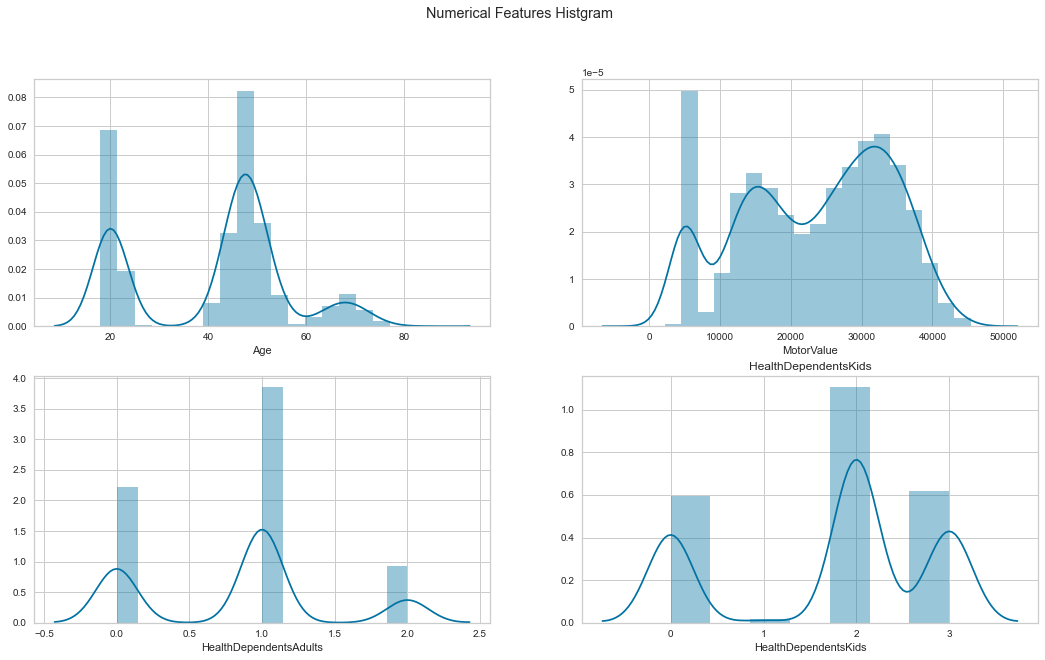

In [14]:
numerical_l = ['Age', 'MotorValue','HealthDependentsAdults', 'HealthDependentsKids']
ban_l = ['Occupation']
categorical_l = [i for i in df.columns if i not in (numerical_l + ban_l)]
l = [0,1]
g = ((i,j) for i in l for j in l)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Numerical Features Histgram')
for i in numerical_l:
    plt.title(i)
    #df[i].hist()
    sns.distplot(df_new.loc[:,i],ax=axes[next(g)])
plt.show()

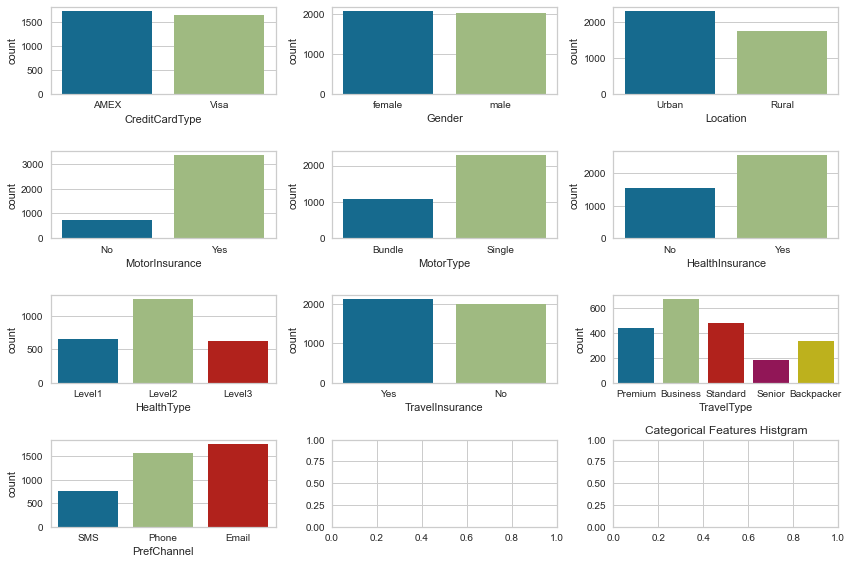

In [15]:
l = [0,1,2,3]
l2 = [0,1,2]
g = ((i,j) for i in l for j in l2)
g2 = ((i,j) for i in l for j in l2)
fig, axes = plt.subplots(4,3, figsize=(12, 8))
plt.title('Categorical Features Histgram')
for i in categorical_l[5:]:
    #axes[next(g2)].set_title(i)
    #df[i].hist()
    sns.countplot(df_new.loc[:,i],ax=axes[next(g)])
plt.tight_layout()
plt.show()

In [16]:
# clean creditcardtype null=0, AMEX=1, visa=2
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4084 non-null   int64  
 1   Title                   4084 non-null   object 
 2   GivenName               4084 non-null   object 
 3   MiddleInitial           4084 non-null   object 
 4   Surname                 4084 non-null   object 
 5   CreditCardType          3363 non-null   object 
 6   Occupation              2529 non-null   object 
 7   Gender                  4084 non-null   object 
 8   Age                     4084 non-null   int64  
 9   Location                4084 non-null   object 
 10  MotorInsurance          4084 non-null   object 
 11  MotorValue              3355 non-null   float64
 12  MotorType               3355 non-null   object 
 13  HealthInsurance         4084 non-null   object 
 14  HealthType              2540 non-null   

In [17]:
df_new.describe()

,CustomerID,Age,MotorValue,HealthDependentsAdults,HealthDependentsKids
count,4084.000000,4084.000000,3355.000000,2540.000000,2540.000000
mean,2607.532566,41.328355,23360.953204,0.816535,1.748425
std,1496.961367,15.565153,10585.456338,0.645677,1.108214
min,1.000000,18.000000,0.000000,0.000000,0.000000
25%,1298.750000,22.000000,14850.000000,0.000000,0.000000
50%,2597.500000,46.000000,25048.000000,1.000000,2.000000
75%,3910.250000,50.000000,32288.000000,1.000000,3.000000
max,5200.000000,84.000000,45374.000000,2.000000,3.000000


In [18]:
# 3. Replace null values
#Creditcardtype
df_new['CreditCardType'].fillna('NoCreditCard', inplace=True)
df_new['MotorValue'].fillna(0, inplace=True)
df_new['MotorType'].fillna('NoMotorType', inplace=True)
df_new['HealthType'].fillna('NoHealthType', inplace=True)
df_new['TravelType'].fillna('NoTravelType', inplace=True)
df_new['HealthDependentsAdults'].fillna(0, inplace=True)
df_new['HealthDependentsKids'].fillna(0, inplace=True)

/Users/gaobotao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4084 non-null   int64  
 1   Title                   4084 non-null   object 
 2   GivenName               4084 non-null   object 
 3   MiddleInitial           4084 non-null   object 
 4   Surname                 4084 non-null   object 
 5   CreditCardType          4084 non-null   object 
 6   Occupation              2529 non-null   object 
 7   Gender                  4084 non-null   object 
 8   Age                     4084 non-null   int64  
 9   Location                4084 non-null   object 
 10  MotorInsurance          4084 non-null   object 
 11  MotorValue              4084 non-null   float64
 12  MotorType               4084 non-null   object 
 13  HealthInsurance         4084 non-null   object 
 14  HealthType              4084 non-null   

In [20]:
df_new.HealthDependentsAdults.isnull().sum()

0

In [21]:
df_new.HealthDependentsAdults = df_new.HealthDependentsAdults.astype(int)
df_new.HealthDependentsKids = df_new.HealthDependentsKids.astype(int)

/Users/gaobotao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


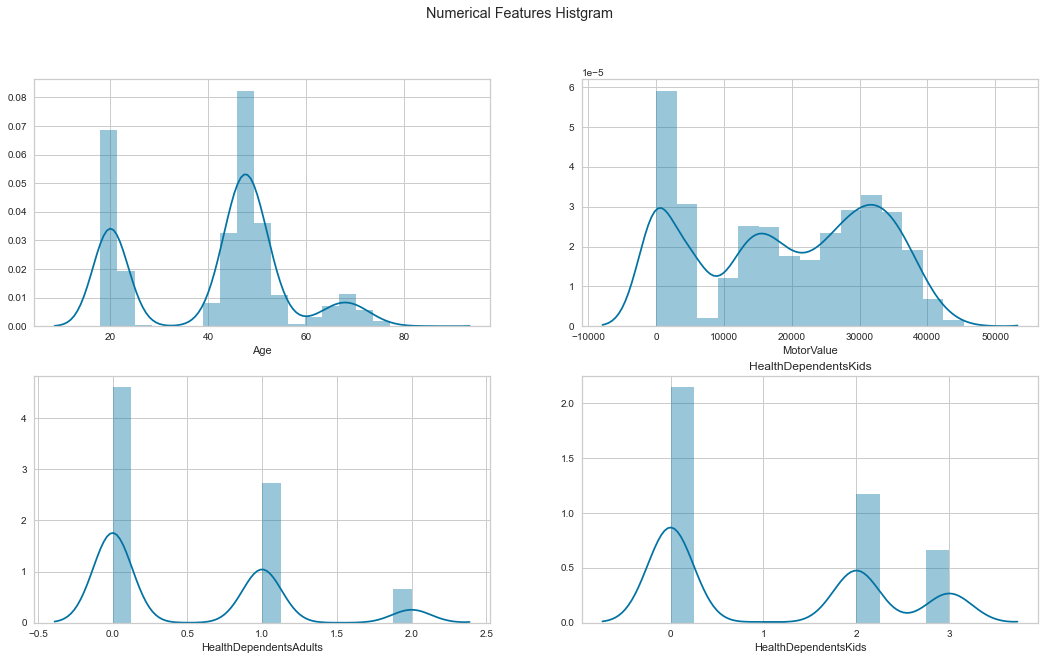

In [22]:
numerical_l = ['Age', 'MotorValue','HealthDependentsAdults', 'HealthDependentsKids']
ban_l = ['Occupation']
categorical_l = [i for i in df.columns if i not in (numerical_l + ban_l)]
l = [0,1]
g = ((i,j) for i in l for j in l)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Numerical Features Histgram')
for i in numerical_l:
    plt.title(i)
    #df[i].hist()
    sns.distplot(df_new.loc[:,i],ax=axes[next(g)])
plt.show()

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4084 non-null   int64  
 1   Title                   4084 non-null   object 
 2   GivenName               4084 non-null   object 
 3   MiddleInitial           4084 non-null   object 
 4   Surname                 4084 non-null   object 
 5   CreditCardType          4084 non-null   object 
 6   Occupation              2529 non-null   object 
 7   Gender                  4084 non-null   object 
 8   Age                     4084 non-null   int64  
 9   Location                4084 non-null   object 
 10  MotorInsurance          4084 non-null   object 
 11  MotorValue              4084 non-null   float64
 12  MotorType               4084 non-null   object 
 13  HealthInsurance         4084 non-null   object 
 14  HealthType              4084 non-null   

In [24]:
df_new = df_new.drop('Occupation', axis=1)

In [25]:
df_new.describe()

,CustomerID,Age,MotorValue,HealthDependentsAdults,HealthDependentsKids
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,2607.532566,41.328355,19190.988737,0.507835,1.087414
std,1496.961367,15.565153,13118.342190,0.645023,1.217655
min,1.000000,18.000000,0.000000,0.000000,0.000000
25%,1298.750000,22.000000,5150.250000,0.000000,0.000000
50%,2597.500000,46.000000,19745.500000,0.000000,0.000000
75%,3910.250000,50.000000,30911.750000,1.000000,2.000000
max,5200.000000,84.000000,45374.000000,2.000000,3.000000


In [26]:
# 4. Encoding categorical values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4089
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4084 non-null   int64  
 1   Title                   4084 non-null   object 
 2   GivenName               4084 non-null   object 
 3   MiddleInitial           4084 non-null   object 
 4   Surname                 4084 non-null   object 
 5   CreditCardType          4084 non-null   object 
 6   Gender                  4084 non-null   object 
 7   Age                     4084 non-null   int64  
 8   Location                4084 non-null   object 
 9   MotorInsurance          4084 non-null   object 
 10  MotorValue              4084 non-null   float64
 11  MotorType               4084 non-null   object 
 12  HealthInsurance         4084 non-null   object 
 13  HealthType              4084 non-null   object 
 14  HealthDependentsAdults  4084 non-null   

In [27]:
df_new.head(10)

,CustomerID,Title,GivenName,MiddleInitial,Surname,CreditCardType,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
0,1,Mrs.,Macy,A,Boyle,AMEX,female,23,Urban,No,0.0,NoMotorType,No,NoHealthType,0,0,Yes,Premium,SMS
1,2,Ms.,Thea,L,McIntosh,AMEX,female,44,Urban,No,0.0,NoMotorType,Yes,Level1,2,3,No,NoTravelType,Phone
2,4,Ms.,Murron,P,Miller,AMEX,female,19,Urban,Yes,4920.0,Bundle,No,NoHealthType,0,0,No,NoTravelType,SMS
3,5,Mr.,Kai,A,Henderson,Visa,male,47,Rural,Yes,14994.0,Single,Yes,Level1,1,2,Yes,Business,Phone
4,11,Mrs.,Kayla,A,Brown,Visa,female,54,Rural,Yes,14605.0,Single,Yes,Level2,2,3,No,NoTravelType,Email
5,13,Mr.,Muhammed,L,King,AMEX,male,49,Rural,Yes,32115.0,Single,Yes,Level1,1,2,Yes,Premium,Email
6,14,Mr.,Lucas,C,Gilbert,Visa,male,19,Rural,Yes,29409.0,Bundle,No,NoHealthType,0,0,Yes,Business,Email
8,17,Ms.,Eve,C,Sutherland,Visa,female,20,Urban,Yes,26503.0,Single,Yes,Level2,0,0,No,NoTravelType,Email
9,18,Mr.,Muhammad,N,McGregor,AMEX,male,49,Urban,Yes,23666.0,Single,Yes,Level2,2,2,No,NoTravelType,Email
10,19,Mr.,Jamie,C,Hunter,NoCreditCard,male,49,Rural,Yes,13498.0,Single,Yes,Level3,1,2,Yes,Standard,Phone


In [59]:
X = df_new.iloc[:,[1] + [i for i in range(5,18)]]
y = df_new.iloc[:,-1]

In [67]:
#4.Encoding
#X['AgeBand'] = pd.cut(X['Age'], 20).cat.codes
oe = OrdinalEncoder()
lb = LabelEncoder()
oh = OneHotEncoder()
mms = MinMaxScaler()
pw = PowerTransformer(method='yeo-johnson')

#Target label encoding
y = lb.fit_transform(y)

# Encode categorical features by onehot encoding
# scale numerical features by minmax scaler
# Make numerical features more gaussian by yeo-johnson
categorical_col = X.select_dtypes(include=['object']).columns
numerical_col = X.select_dtypes(include=['int64', 'float64']).columns
t = [('cat', oh, categorical_col), ('num', mms, numerical_col), ('tran', pw, numerical_col)]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')


In [61]:
X.head(15)

,Title,CreditCardType,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType
0,Mrs.,AMEX,female,23,Urban,No,0.0,NoMotorType,No,NoHealthType,0,0,Yes,Premium
1,Ms.,AMEX,female,44,Urban,No,0.0,NoMotorType,Yes,Level1,2,3,No,NoTravelType
2,Ms.,AMEX,female,19,Urban,Yes,4920.0,Bundle,No,NoHealthType,0,0,No,NoTravelType
3,Mr.,Visa,male,47,Rural,Yes,14994.0,Single,Yes,Level1,1,2,Yes,Business
4,Mrs.,Visa,female,54,Rural,Yes,14605.0,Single,Yes,Level2,2,3,No,NoTravelType
5,Mr.,AMEX,male,49,Rural,Yes,32115.0,Single,Yes,Level1,1,2,Yes,Premium
6,Mr.,Visa,male,19,Rural,Yes,29409.0,Bundle,No,NoHealthType,0,0,Yes,Business
8,Ms.,Visa,female,20,Urban,Yes,26503.0,Single,Yes,Level2,0,0,No,NoTravelType
9,Mr.,AMEX,male,49,Urban,Yes,23666.0,Single,Yes,Level2,2,2,No,NoTravelType
10,Mr.,NoCreditCard,male,49,Rural,Yes,13498.0,Single,Yes,Level3,1,2,Yes,Standard


In [62]:
y

array([2, 1, 2, ..., 0, 0, 0])

In [71]:
#rfe = RFECV(SVR(kernel='linear'), step=5, scoring='accuracy', min_features_to_select = 10)
model = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)
model2 = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.2, min_samples_leaf=12, min_samples_split=9, n_estimators=100)
pipeline = Pipeline(steps=[('prep', transformer),('m', model2)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_micro', n_jobs=1)
print('Accuracy: %.3f (%.3f)' %(np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.664 (0.019)
